# FIRST STUFF

In [53]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
import seaborn as se
import matplotlib.pyplot as plt

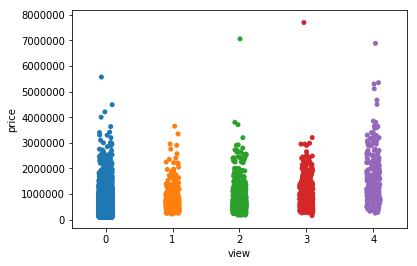

In [11]:
se.stripplot(x = "view",y = "price", data = data)

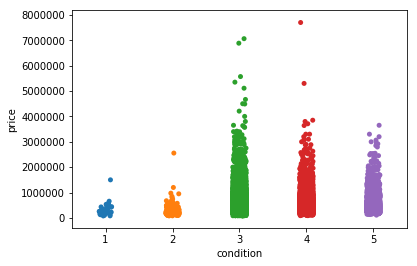

In [12]:
se.stripplot(x = "condition",y = "price", data = data)

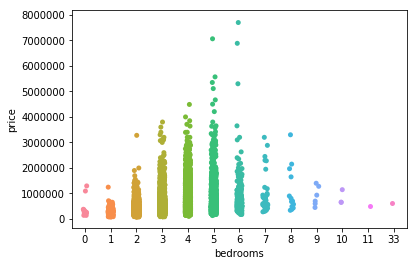

In [13]:
se.stripplot(x = "bedrooms",y = "price", data = data)

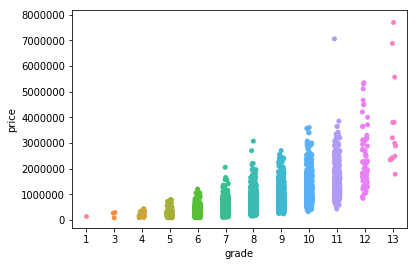

In [14]:
se.stripplot(x = "grade",y = "price", data = data)

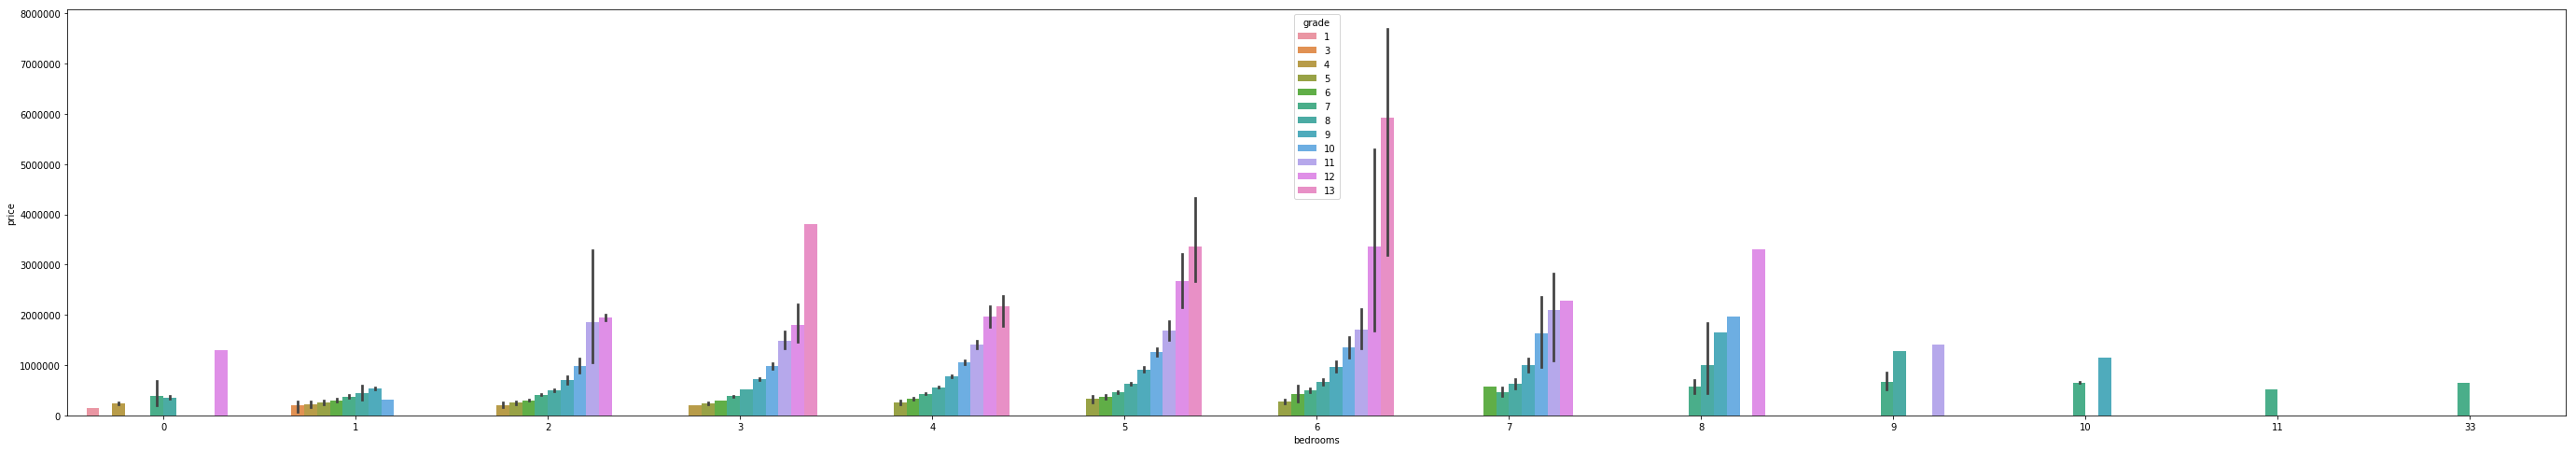

In [19]:
plt.figure(figsize = (48,8))
se.barplot(x = "bedrooms",y = "price", hue = "grade", data = data)

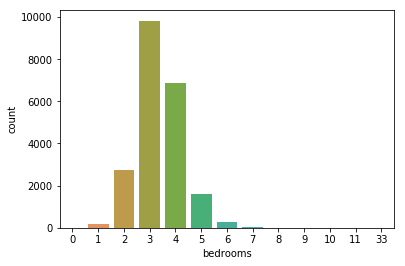

In [20]:
se.countplot(x= "bedrooms", data = data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


In [22]:
columns = ['view', 'floors','condition', 'grade', 'sqft_living',  'bedrooms', 'yr_built', 'yr_renovated']

label = data['price'].values

features = data[list(columns)].values

In [23]:
features

array([[0.000e+00, 1.000e+00, 3.000e+00, ..., 3.000e+00, 1.955e+03,
        0.000e+00],
       [0.000e+00, 2.000e+00, 3.000e+00, ..., 3.000e+00, 1.951e+03,
        1.991e+03],
       [0.000e+00, 1.000e+00, 3.000e+00, ..., 2.000e+00, 1.933e+03,
        0.000e+00],
       ...,
       [0.000e+00, 2.000e+00, 3.000e+00, ..., 2.000e+00, 2.009e+03,
        0.000e+00],
       [0.000e+00, 2.000e+00, 3.000e+00, ..., 3.000e+00, 2.004e+03,
        0.000e+00],
       [0.000e+00, 2.000e+00, 3.000e+00, ..., 2.000e+00, 2.008e+03,
        0.000e+00]])

In [26]:
xtrain, xtest, ytrain, ytest =train_test_split(features, label, test_size = 0.3)

In [27]:
regr = linear_model.LinearRegression()

regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# R2 for training
r2_score(ytrain, regr.predict(xtrain),multioutput='variance_weighted') 

0.6335207722568286

In [30]:
# R2 for testing
r2_score(ytest, regr.predict(xtest),multioutput='variance_weighted') 

0.6320167345853518

In [33]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)

svr.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
# R2 for training
r2_score(ytrain, svr.predict(xtrain),multioutput='variance_weighted') 

-0.057798273388748544

In [35]:
# R2 for testing
r2_score(ytest, svr.predict(xtest),multioutput='variance_weighted') 

-0.05663052454042728

# Let's to this the right way.
If you are interested to understand more about data normalization and why it important you can read further from here: https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

The coefficient R^2 is defined as **(1 - u/v)**, where u is the residual sum of squares ((y_true - y_pred) 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) 2).sum(). **The best possible score is 1.0**

In [37]:
# initialize our scaler
scaler = StandardScaler()

# we fit the scaler on the training data only
scaler.fit(xtrain)

# now we use the scaler to transform both training and test
scaled_xtrain = scaler.transform(xtrain)
scaled_xtest = scaler.transform(xtest)


In [43]:
# let's now see if the linear regression model will learn better from scaled data

regr2 = linear_model.LinearRegression()

regr2.fit(scaled_xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
# R2 for training
r2 = r2_score(ytrain, regr2.predict(scaled_xtrain)) 

print("R2 score for linear regressor model training = {0}".format(r2))

R2 score for linear regressor model training = 0.6335207722568286


In [48]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(ytrain, regr2.predict(scaled_xtrain))  
print("Explained variance Score for linear regressor model training = {0}".format(evs))

Explained variance Score for linear regressor model training = 0.6335207722568286


#### As you can see our model isn't improving that much, if you are a machine learning engineer then this will be your work for the next couple of week to understand what is going not right. For now you can one more thing.

To add a context we are trying to improve the model r2 score into something higher than 0.633 =~ 1.00, and so far the best model out there is at r2 = 0.7
You can say that we are near but not just there YET!!

#### Add more features and don't forget to scale the features before training

In [71]:
# Choose more columns
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']

# extract the values from the columns
features = data[list(columns)].values

# we keep the prices as they are
label = data['price'].values

# split the data
xtrain, xtest, ytrain, ytest =train_test_split(features, label, test_size = 0.3)


In [72]:
# initialize our scaler
scaler = StandardScaler()

# we fit the scaler on the training data only
scaler.fit(xtrain)

# print th mean of each column
print(scaler.mean_)

# now we use the scaler to transform both training and test
scaled_xtrain = scaler.transform(xtrain)
scaled_xtest = scaler.transform(xtest)


[3.36605195e+00 2.10876462e+00 2.07215645e+03 1.49742636e+04
 1.49081235e+00 7.33690264e-03 2.37028224e-01 3.41146143e+00
 7.64432547e+00 1.77956547e+03 2.92590984e+02 1.97088783e+03
 8.00609426e+01 1.98032487e+03 1.27270596e+04]


In [74]:
# let's now see if the linear regression model will learn better from scaled data

regr3 = linear_model.LinearRegression()

regr3.fit(scaled_xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
# R2 for training
r2 = r2_score(ytrain, regr3.predict(scaled_xtrain)) 

print("R2 score for linear regressor model training = {0}".format(r2))

R2 score for linear regressor model training = 0.6525452196584287


### Slight improvment over the previous result. If we tried harder we can somewhat closer to 1.0 but it gonna get harder to make even the slightest improvement over this. So let's just leave it here.